# Assignment 16

In [27]:
# import dependencies
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
import numpy as np
import pandas as pd

In [28]:
# define functions
def plot_tree_classification(model, features, class_names):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          class_names=class_names,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (predictions == actuals).sum() / len(actuals)

In [29]:
dataset = pd.read_csv('../datasets/Movie_data_file.csv')

# Drop rows with missing values
# dataset = dataset.dropna()

# Ensure the 'Genres' column is formatted as strings
if 'Genres' in dataset.columns:
    # Convert array-like values to comma-separated strings (if needed)
    dataset['Genres'] = dataset['Genres'].apply(lambda x: ','.join(x) if isinstance(x, list) else str(x))
    
    # Split the genres into individual values and apply one-hot encoding
    genres_split = dataset['Genres'].str.get_dummies(sep=',')
    
    # Concatenate the one-hot encoded genres back to the dataset
    dataset = pd.concat([dataset, genres_split], axis=1)
    
    # Drop the original 'Genres' column
    dataset = dataset.drop('Genres', axis=1)

# Display the first few rows of the updated dataset
dataset.head()
dataset.to_csv('processed_movie_data.csv', index=False)

# irisCorrelations = dataset.corr(numeric_only=True)
# irisCorrelations.style.background_gradient(cmap='coolwarm', axis=None).format(precision=2) # Format the output, precision is the number of decimal places

# dataset.head()

In [30]:
# split dataset
dataset_train, dataset_test = train_test_split(dataset, test_size=0.3, random_state=42, stratify=dataset['category'])
# print(dataset_train.shape, dataset_test.shape)

KeyError: 'category'

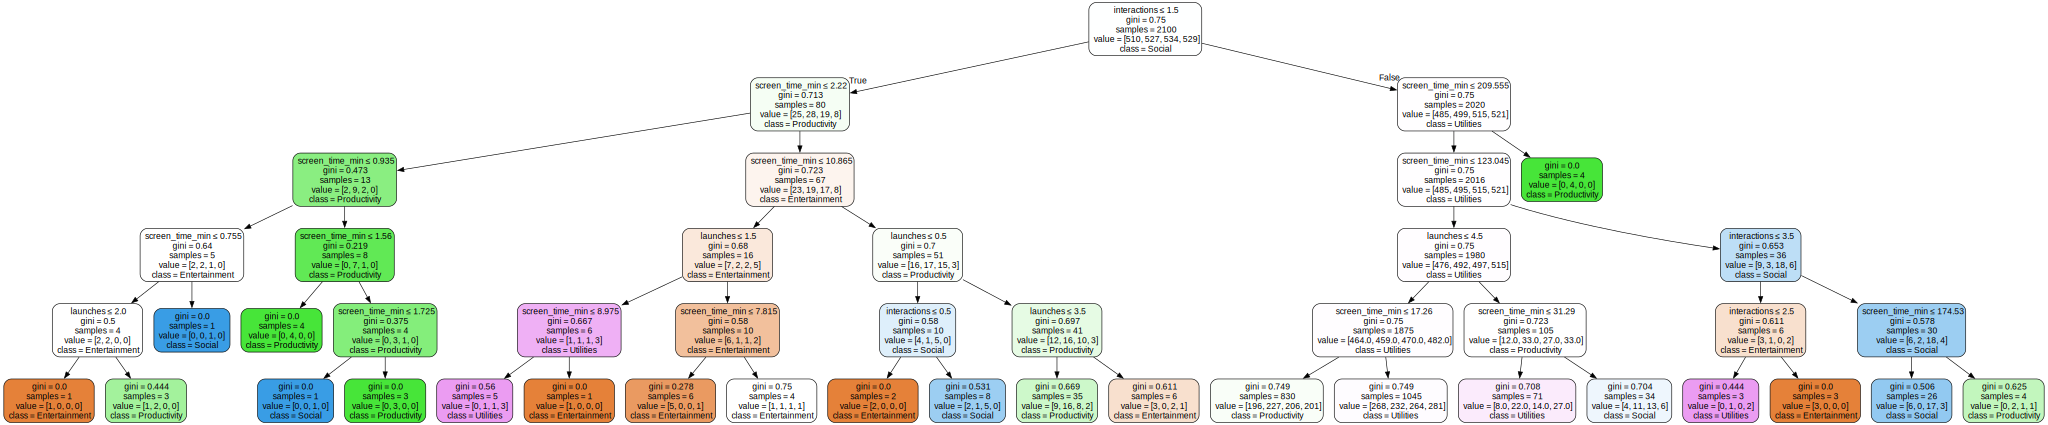

In [ ]:
# create decisiontree
features= ['screen_time_min', 'interactions', 'launches']
dt_classification = DecisionTreeClassifier(max_depth = 5) # Increase max_depth to see effect in the plot
dt_classification.fit(dataset_train[features], dataset_train['category'])

plot_tree_classification(dt_classification, features, np.sort(dataset.category.unique()))


In [ ]:
# calculate accuracy of model predictions
predictionsOnTrainset = dt_classification.predict(dataset_train[features])
predictionsOnTestset = dt_classification.predict(dataset_test[features])

accuracyTrain = calculate_accuracy(predictionsOnTrainset, dataset_train.category)
accuracyTest = calculate_accuracy(predictionsOnTestset, dataset_test.category)

print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

Accuracy on training set 0.29714285714285715
Accuracy on test set 0.2577777777777778


## Conclusion
The features used to determine the app's category do not appear to be effective predictors, as the model's accuracy is relatively low.